In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#Analysis with Central Included
summary_csv = "data/summary_crime_final.csv"
summary_crime = pd.read_csv(summary_csv)
housing_csv = 'data/msp_community_summary.csv'
housing_data = pd.read_csv(housing_csv)
housing=housing_data[['Community', 'House Value per Sqft']]
housing

,Community,House Value per Sqft
0,Calhoun-Isle,217.785079
1,Camden,89.854937
2,Central,311.932827
3,Longfellow,149.614650
4,Near North,80.650318
5,Nokomis,145.605115
6,North East,130.920763
7,Phillips,99.845649
8,Powderhorn,123.904829
9,Southwest,190.539065


In [3]:
#Merge my summary table with the price per squar foot values created in the housing analysis.
analysis_df = pd.merge(summary_crime, housing, how='outer', on='Community')
analysis_df

,Community,Population,Total Crime (2015-2020),Violent Crime (2015-2020),Non-Violent Crime (2015-2020),Total Crime Rate (per 1000 people),Violent Crime Rate (per 1000 people),Non-Violent Crime Rate (per 1000 people),House Value per Sqft
0,Calhoun-Isle,30487,8893,2079,6814,58.34,13.64,44.70,217.785079
1,Camden,30586,7916,3966,3950,51.76,25.93,25.83,89.854937
2,Central,34490,19839,4466,15373,115.04,25.90,89.14,311.932827
3,Longfellow,28490,8612,2331,6281,60.46,16.36,44.09,149.614650
4,Near North,34902,8661,4203,4457,49.63,24.08,25.54,80.650318
5,Nokomis,38503,5164,2115,3049,26.82,10.99,15.84,145.605115
6,North East,38226,6629,2117,4511,34.68,11.08,23.60,130.920763
7,Phillips,22433,7211,2935,4276,64.29,26.17,38.12,99.845649
8,Powderhorn,58154,13741,5361,8380,47.26,18.44,28.82,123.904829
9,Southwest,49820,5625,1844,3781,22.58,7.40,15.18,190.539065


In [4]:
#Create a function to perform the regression analysis.
def line_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_values = x * slope + intercept
    plt.plot(x_values, regress_values, "r-")
    plt.legend([line_eq + "\nr-squared = " + str(round(rvalue*rvalue, 2))])
    print(line_eq)
    print("The r-squared value is " + str(round(rvalue**2, 2)))
    print('The r-value is ' + rvalue)

y = 1.47x + 81.19
The r-squared value is 0.29
0.5420331159106777


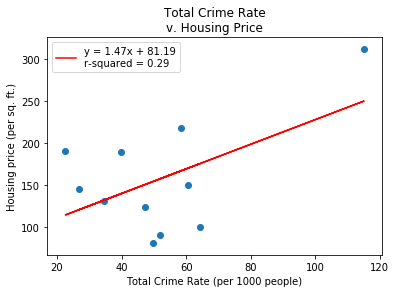

In [5]:
#Plot the various crime rate statistics against housing price.
x_values = analysis_df['Total Crime Rate (per 1000 people)']
y_values = analysis_df['House Value per Sqft']
line_reg(x_values, y_values)
plt.title('Total Crime Rate\nv. Housing Price')
plt.xlabel('Total Crime Rate (per 1000 people)')
plt.ylabel('Housing price (per sq. ft.)')
plt.scatter(x_values, y_values)
plt.savefig("data/total crime with central.png")

y = -1.65x + 185.77
The r-squared value is 0.03
-0.17440260735983482


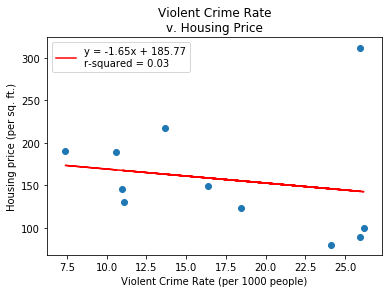

In [6]:
x_values = analysis_df['Violent Crime Rate (per 1000 people)']
y_values = analysis_df['House Value per Sqft']
line_reg(x_values, y_values)
plt.title('Violent Crime Rate\nv. Housing Price')
plt.xlabel('Violent Crime Rate (per 1000 people)')
plt.ylabel('Housing price (per sq. ft.)')
plt.scatter(x_values, y_values)
plt.savefig("data/violent crime with central.png")

y = 2.34x + 76.37
The r-squared value is 0.51
0.7157723879893275


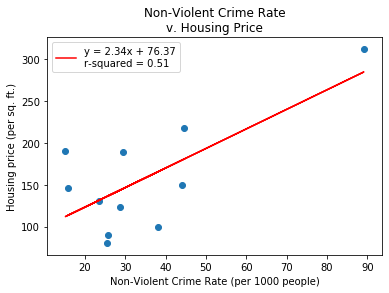

In [7]:
x_values = analysis_df['Non-Violent Crime Rate (per 1000 people)']
y_values = analysis_df['House Value per Sqft']
line_reg(x_values, y_values)
plt.title('Non-Violent Crime Rate\nv. Housing Price')
plt.xlabel('Non-Violent Crime Rate (per 1000 people)')
plt.ylabel('Housing price (per sq. ft.)')
plt.scatter(x_values, y_values)
plt.savefig("data/non-violent crime with central.png")

In [8]:
#Analysis excluding Central completely.  I imported a spreadsheet that removed the central community from the summary table.
summary_xcentral_csv = "data/summary_crime_final - Copy.csv"
summary_crime_xcentral = pd.read_csv(summary_xcentral_csv)
housing_xcentral_csv = 'data/msp_community_summary - Copy.csv'
housing_data_xcentral = pd.read_csv(housing_xcentral_csv)
housing_xcentral=housing_data_xcentral[['Community', 'House Value per Sqft']]
housing_xcentral

,Community,House Value per Sqft
0,Calhoun-Isle,217.785079
1,Camden,89.854937
2,Longfellow,149.614650
3,Near North,80.650318
4,Nokomis,145.605115
5,North East,130.920763
6,Phillips,99.845649
7,Powderhorn,123.904829
8,Southwest,190.539065
9,University,189.266289


In [9]:
analysis_xcentral = pd.merge(summary_crime_xcentral, housing_xcentral, how='outer', on='Community')
analysis_xcentral

,Community,Population,Total Crime (2015-2020),Violent Crime (2015-2020),Non-Violent Crime (2015-2020),Total Crime Rate (per 1000 people),Violent Crime Rate (per 1000 people),Non-Violent Crime Rate (per 1000 people),House Value per Sqft
0,Calhoun-Isle,30487,8893,2079,6814,58.34,13.64,44.70,217.785079
1,Camden,30586,7916,3966,3950,51.76,25.93,25.83,89.854937
2,Longfellow,28490,8612,2331,6281,60.46,16.36,44.09,149.614650
3,Near North,34902,8661,4203,4457,49.63,24.08,25.54,80.650318
4,Nokomis,38503,5164,2115,3049,26.82,10.99,15.84,145.605115
5,North East,38226,6629,2117,4511,34.68,11.08,23.60,130.920763
6,Phillips,22433,7211,2935,4276,64.29,26.17,38.12,99.845649
7,Powderhorn,58154,13741,5361,8380,47.26,18.44,28.82,123.904829
8,Southwest,49820,5625,1844,3781,22.58,7.40,15.18,190.539065
9,University,45061,8996,2383,6612,39.93,10.58,29.35,189.266289


y = -0.9x + 182.79
The r-squared value is 0.08
-0.27776941229828184


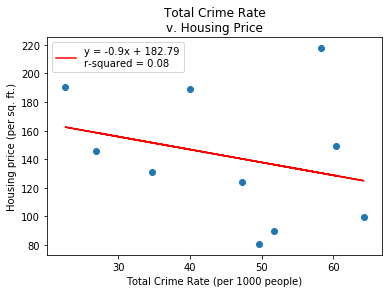

In [10]:
x_values = analysis_xcentral['Total Crime Rate (per 1000 people)']
y_values = analysis_xcentral['House Value per Sqft']
line_reg(x_values, y_values)
plt.title('Total Crime Rate\nv. Housing Price')
plt.xlabel('Total Crime Rate (per 1000 people)')
plt.ylabel('Housing price (per sq. ft.)')
plt.scatter(x_values, y_values)
plt.savefig("data/total crime no central.png")

y = -5.35x + 229.94
The r-squared value is 0.64
-0.8023389631392056


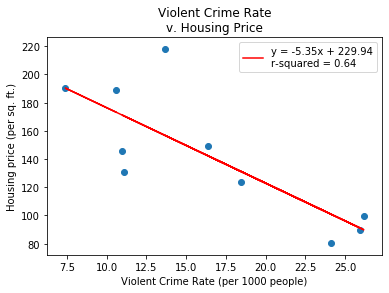

In [11]:
x_values = analysis_xcentral['Violent Crime Rate (per 1000 people)']
y_values = analysis_xcentral['House Value per Sqft']
line_reg(x_values, y_values)
plt.title('Violent Crime Rate\nv. Housing Price')
plt.xlabel('Violent Crime Rate (per 1000 people)')
plt.ylabel('Housing price (per sq. ft.)')
plt.scatter(x_values, y_values)
plt.savefig("data/violent crime no central.png")

y = 0.68x + 122.07
The r-squared value is 0.02
0.15293062361693488


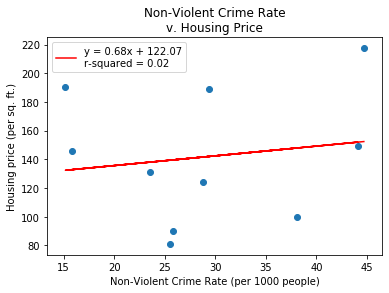

In [12]:
x_values = analysis_xcentral['Non-Violent Crime Rate (per 1000 people)']
y_values = analysis_xcentral['House Value per Sqft']
line_reg(x_values, y_values)
plt.title('Non-Violent Crime Rate\nv. Housing Price')
plt.xlabel('Non-Violent Crime Rate (per 1000 people)')
plt.ylabel('Housing price (per sq. ft.)')
plt.scatter(x_values, y_values)
plt.savefig("data/non-violent crime no central.png")

In [13]:
#Analysis breaking down Central into its neighborhoods
summary_central = "data/summary_crime_no_central.csv"
summary_crime = pd.read_csv(summary_central)
housing_central = 'data/msp_community_summary_no_central.csv'
housing_data = pd.read_csv(housing_central)
housing=housing_data[['Community', 'House Value per Sqft']]
housing

,Community,House Value per Sqft
0,Calhoun-Isle,217.785079
1,Camden,89.854937
2,Downtown East,382.934875
3,Downtown West,315.158569
4,Elliot Park,307.638752
5,Loring Park,226.402644
6,North Loop,316.062302
7,Steven's Square/Loring Heights,190.297286
8,Longfellow,149.614650
9,Near North,80.650318


In [14]:
analysis_central = pd.merge(summary_crime, housing, how='outer', on='Community')
analysis_central

,Community,Population,Total Crime (2015-2020),Violent Crime (2015-2020),Non-Violent Crime (2015-2020),Total Crime Rate (per 1000 people),Violent Crime Rate (per 1000 people),Non-Violent Crime Rate (per 1000 people),House Value per Sqft
0,Calhoun-Isle,30487,8893,2079,6814,58.34,13.64,44.70,217.785079
1,Camden,30586,7916,3966,3950,51.76,25.93,25.83,89.854937
2,Downtown East,1254,990,119,871,157.89,18.98,138.92,382.934875
3,Downtown West,7466,11306,2257,9049,302.87,60.46,242.41,315.158569
4,Elliot Park,6596,1978,618,1360,59.98,18.74,41.24,307.638752
5,Loring Park,8835,2425,645,1780,54.90,14.60,40.29,226.402644
6,North Loop,5760,990,119,871,34.38,4.13,30.24,316.062302
7,Steven's Square/Loring Heights,4031,1074,393,681,53.29,19.50,33.79,190.297286
8,Longfellow,28490,8612,2331,6281,60.46,16.36,44.09,149.614650
9,Near North,34902,8661,4203,4457,49.63,24.08,25.54,80.650318


y = 0.7x + 148.43
The r-squared value is 0.28
0.5277134686684521


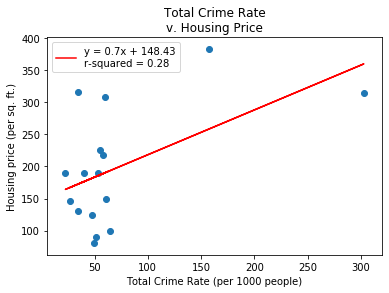

In [15]:
x_values = analysis_central['Total Crime Rate (per 1000 people)']
y_values = analysis_central['House Value per Sqft']
line_reg(x_values, y_values)
plt.title('Total Crime Rate\nv. Housing Price')
plt.xlabel('Total Crime Rate (per 1000 people)')
plt.ylabel('Housing price (per sq. ft.)')
plt.scatter(x_values, y_values)
plt.show()

y = 0.84x + 181.45
The r-squared value is 0.01
0.11764108019154872


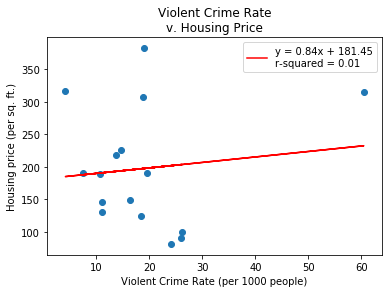

In [16]:
x_values = analysis_central['Violent Crime Rate (per 1000 people)']
y_values = analysis_central['House Value per Sqft']
line_reg(x_values, y_values)
plt.title('Violent Crime Rate\nv. Housing Price')
plt.xlabel('Violent Crime Rate (per 1000 people)')
plt.ylabel('Housing price (per sq. ft.)')
plt.scatter(x_values, y_values)
plt.show()

y = 0.94x + 149.27
The r-squared value is 0.36
0.5991606000664884


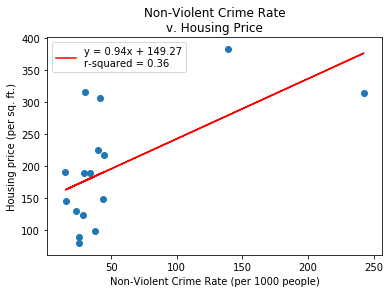

In [17]:
x_values = analysis_central['Non-Violent Crime Rate (per 1000 people)']
y_values = analysis_central['House Value per Sqft']
line_reg(x_values, y_values)
plt.title('Non-Violent Crime Rate\nv. Housing Price')
plt.xlabel('Non-Violent Crime Rate (per 1000 people)')
plt.ylabel('Housing price (per sq. ft.)')
plt.scatter(x_values, y_values)
plt.show()